In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('E:\Datasets\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


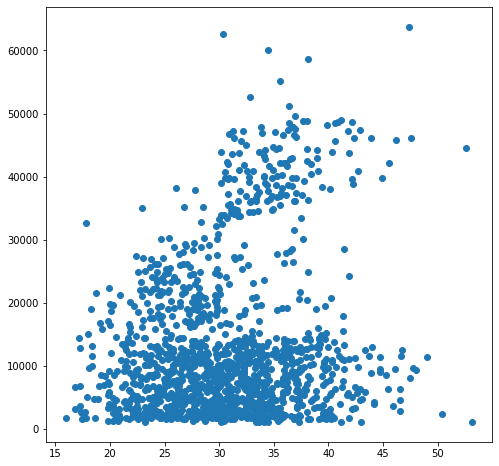

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(x = df['bmi'], y = df['charges'])

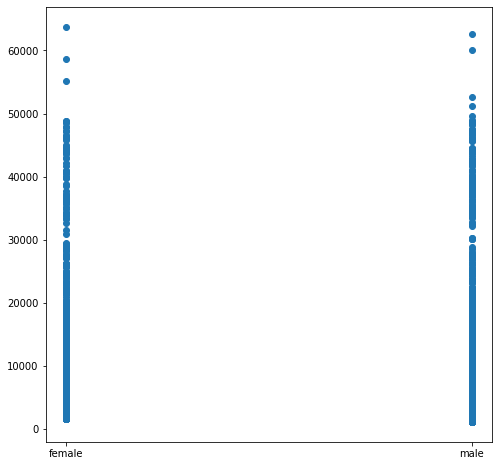

In [75]:
plt.figure(figsize=(8,8))
plt.scatter(x = df['sex'], y = df['charges'] )

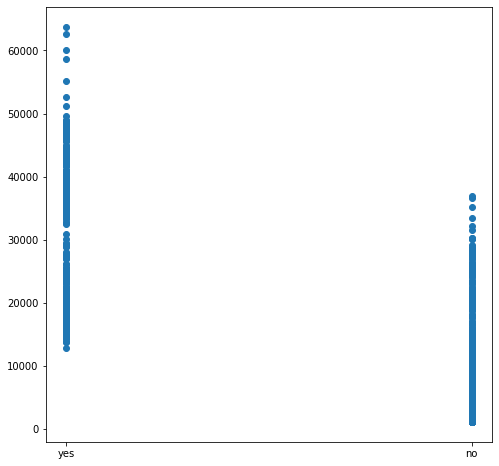

In [76]:
plt.figure(figsize=(8,8))
plt.scatter(x = df['smoker'], y = df['charges'])

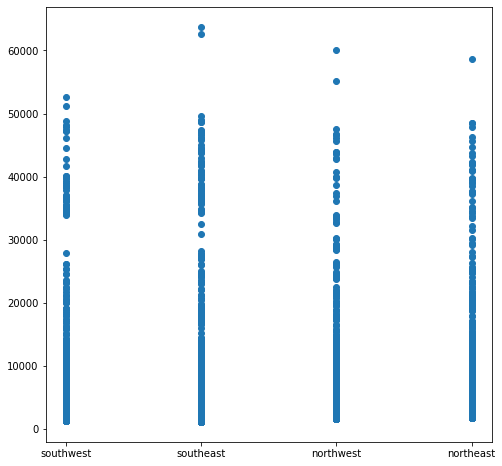

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(x = df['region'], y = df['charges'])

In [89]:
df['sex'] = df['sex'].replace(['male', 'female'], ['0','1'])
df['sex'] = pd.to_numeric(df['sex'])
df['smoker'] = df['smoker'].replace(['yes', 'no'], ['1','0'])
df['smoker'] = pd.to_numeric(df['smoker'])
df['region'] = df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], ['0','1','2','3'])
df['region'] = pd.to_numeric(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


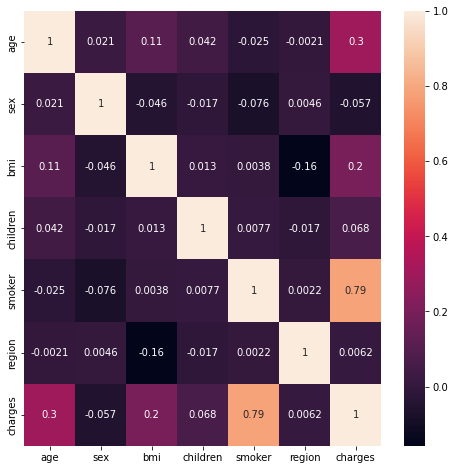

In [90]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(df.corr(), xticklabels=True,yticklabels=True,annot=True)
plt.show()

In [91]:
y = df.pop('charges')

In [81]:
df.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [92]:
mms = MinMaxScaler()
x = mms.fit_transform(df)
x

array([[0.02173913, 1.        , 0.3212268 , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.47914985, 0.2       , 0.        ,
        0.33333333],
       [0.2173913 , 0.        , 0.45843422, 0.6       , 0.        ,
        0.33333333],
       ...,
       [0.        , 1.        , 0.56201238, 0.        , 0.        ,
        0.33333333],
       [0.06521739, 1.        , 0.26472962, 0.        , 0.        ,
        0.        ],
       [0.93478261, 1.        , 0.35270379, 0.        , 1.        ,
        0.66666667]])

In [83]:
pca = PCA()
x = pca.fit_transform(x)
x

array([[-0.35301949,  0.8746572 , -0.49682133, -0.44909558, -0.18820826,
        -0.07270796],
       [ 0.46542243, -0.27221322, -0.14898225, -0.45816651,  0.01448871,
         0.09818405],
       [ 0.46461203, -0.27936288, -0.15890079, -0.20881976,  0.39373738,
         0.05900993],
       ...,
       [-0.52046877, -0.10343416, -0.16518036, -0.48266038, -0.17386554,
         0.19847716],
       [-0.52415689, -0.11115859, -0.47229124, -0.45035404, -0.18364866,
        -0.13047828],
       [-0.37808166,  0.85424001,  0.14818116,  0.47666207, -0.25728849,
        -0.05817712]])

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=100)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 6), (1070,), (268, 6), (268,))

In [102]:
model = LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.7380305957382404

In [103]:
prediction = model.predict(xtest)

In [104]:
r2_score(prediction,ytest)

0.7129866526863382